## 1. What is Unsupervised Learning?
Unsupervised learning is a type of machine learning where the model finds patterns in **unlabeled data** without known outputs.

---

## 2. How Does K-Means Clustering Work?
K-Means:
- Chooses K cluster centers
- Assigns points to nearest center
- Updates centers
- Repeats until stable

---

## 3. What is a Dendrogram?
A dendrogram is a **tree diagram** that shows how clusters merge in **hierarchical clustering**.

---

## 4. Difference Between K-Means and Hierarchical Clustering
- **K-Means:** Fast, requires fixed K
- **Hierarchical:** Builds a cluster tree, no fixed K needed

---

## 5. Advantages of DBSCAN Over K-Means
- Finds clusters of arbitrary shapes  
- Detects noise/outliers  
- Does not require K  

---

## 6. When to Use Silhouette Score?
To measure **cluster quality**, evaluating both **compactness** and **separation**.

---

## 7. Limitations of Hierarchical Clustering
- High memory usage  
- Slow for large datasets  
- Hard to update clusters  

---

## 8. Why Feature Scaling is Important in K-Means?
K-Means uses distance, so **unscaled features distort clustering results**.

---

## 9. How Does DBSCAN Identify Noise Points?
Points with **insufficient neighbors** within radius `eps` are labeled as noise.

---

## 10. What is Inertia in K-Means?
Inertia is the **sum of squared distances** from points to their cluster centers.

---

## 11. What is the Elbow Method?
A method to choose optimal K where inertia **stops decreasing significantly**.

---

## 12. What Does "Density" Mean in DBSCAN?
Density = Number of points within a neighborhood radius (`eps`).

---

## 13. Can Hierarchical Clustering Be Used on Categorical Data?
Yes, using **special distance metrics** like Hamming distance.

---

## 14. What Does a Negative Silhouette Score Indicate?
A negative score means the point is **likely assigned to the wrong cluster**.

---

## 15. What is Linkage Criteria in Hierarchical Clustering?
It defines **how distance between clusters is calculated**:
- Single linkage  
- Complete linkage  
- Average linkage  

---

## 16. Why Does K-Means Perform Poorly with Unequal Cluster Sizes?
Because K-Means assumes **equal-sized spherical clusters**.

---

## 17. Core Parameters in DBSCAN
- `eps` → Neighborhood radius  
- `min_samples` → Minimum density threshold  

---

## 18. How K-Means++ Improves Standard K-Means
It chooses **better initial centers**, improving stability and speed.

---

## 19. What is Agglomerative Clustering?
A **bottom-up** clustering method that merges closest clusters step-by-step.

---

## 20. Why is Silhouette Score Better Than Inertia?
Silhouette Score evaluates **both cluster compactness and separation**, while inertia only measures compactness.

---


1. make_blobs (4 centers) + KMeans

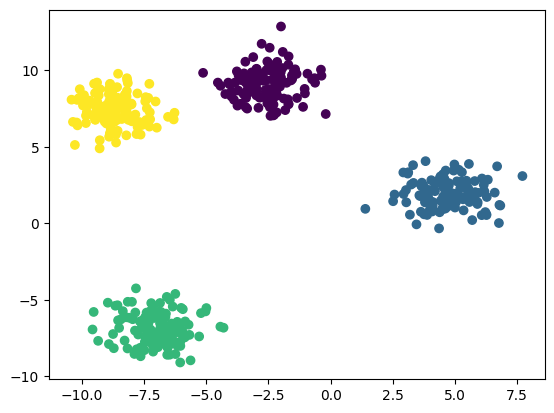

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


2. Iris + Agglomerative Clustering

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)

print(labels[:10])


[1 1 1 1 1 1 1 1 1 1]


3. make_moons + DBSCAN (Outliers Highlighted)

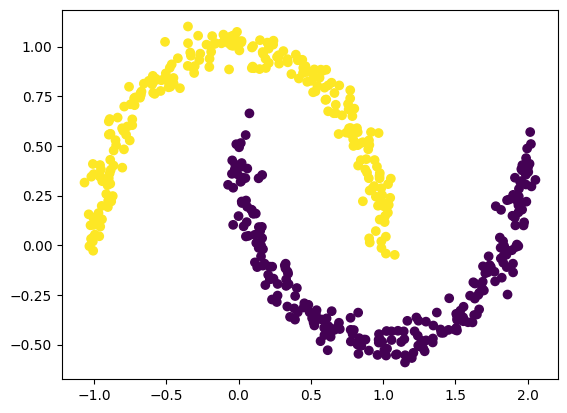

In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=500, noise=0.05)

labels = DBSCAN(eps=0.2).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


4. Wine + StandardScaler + KMeans

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

print(np.bincount(labels))


[51 65 62]


5. make_circles + DBSCAN

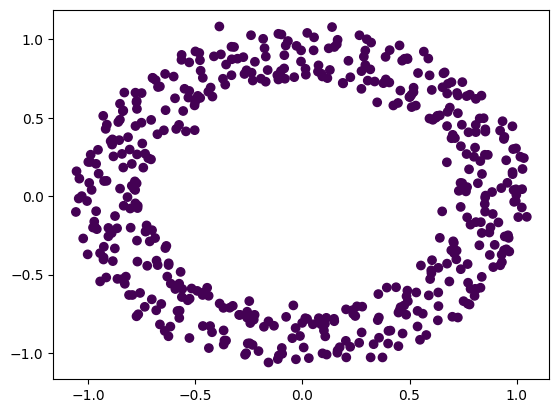

In [5]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, noise=0.05)

labels = DBSCAN(eps=0.2).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


6. Breast Cancer + MinMaxScaler + KMeans

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(kmeans.cluster_centers_)


[[0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]
 [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]]


8. Digits + PCA + KMeans Visualization

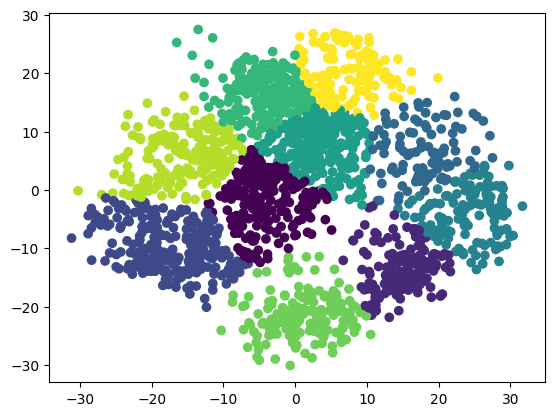

In [7]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = PCA(2).fit_transform(digits.data)

labels = KMeans(10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


9. Silhouette Scores for K=2 to 5

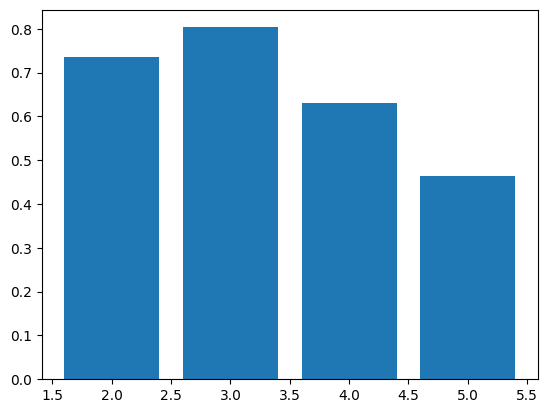

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400)

scores = []
for k in range(2, 6):
    labels = KMeans(k).fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.bar(range(2,6), scores)
plt.show()


10. Iris + Hierarchical Dendrogram

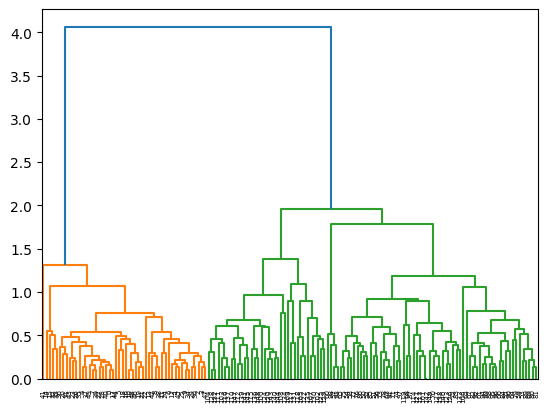

In [9]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

iris = load_iris()
Z = linkage(iris.data, method='average')

dendrogram(Z)
plt.show()


11. Overlapping Blobs + KMeans

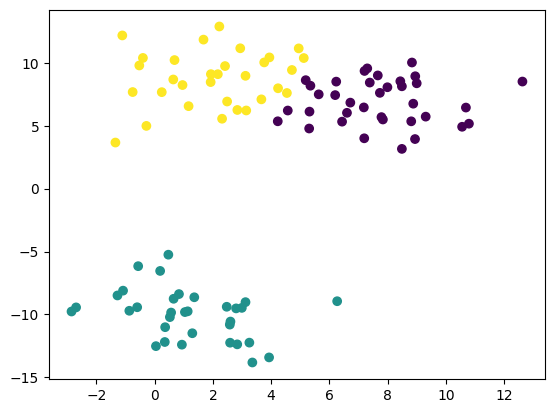

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(cluster_std=2)

labels = KMeans(3).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


12. Digits + t-SNE + DBSCAN

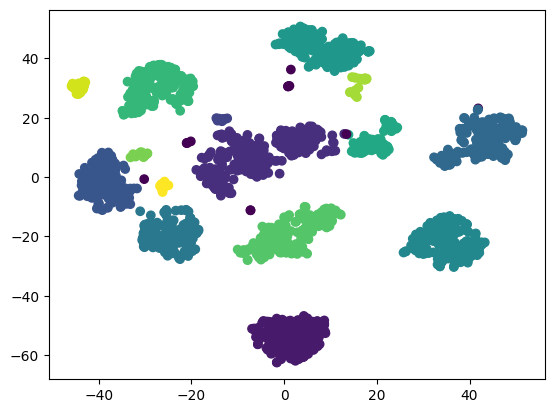

In [11]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X = TSNE(2).fit_transform(digits.data)

labels = DBSCAN(eps=3).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


13. Agglomerative (Complete Linkage)

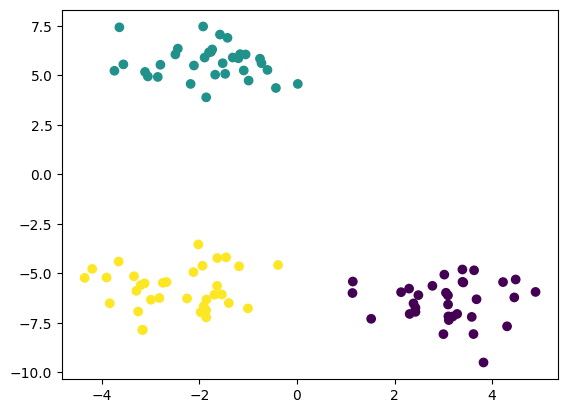

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs()

labels = AgglomerativeClustering(n_clusters=3, linkage='complete').fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


14. Breast Cancer + KMeans Inertia

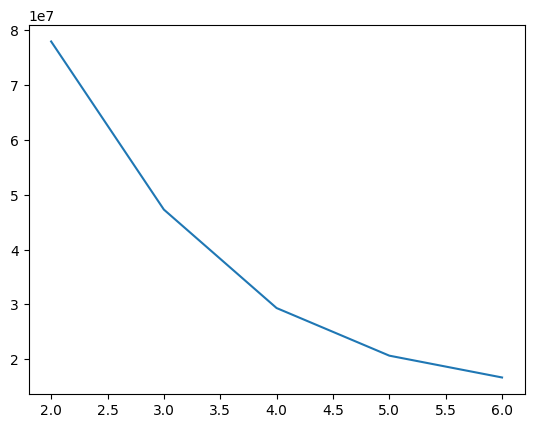

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = load_breast_cancer().data

inertia = []
for k in range(2,7):
    inertia.append(KMeans(k).fit(X).inertia_)

plt.plot(range(2,7), inertia)
plt.show()


15. Circles + Agglomerative (Single Linkage)

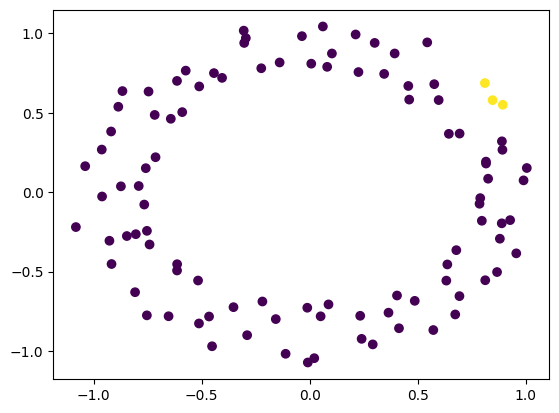

In [14]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_circles(noise=0.05)

labels = AgglomerativeClustering(n_clusters=2, linkage='single').fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


16. Wine + DBSCAN Cluster Count

In [15]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X = StandardScaler().fit_transform(load_wine().data)

labels = DBSCAN(eps=0.8).fit_predict(X)

clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Clusters:", clusters)


Clusters: 0


17. make_blobs + KMeans + Centers

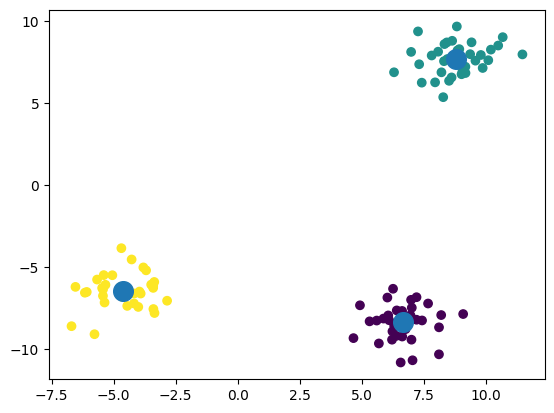

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs()

kmeans = KMeans(3).fit(X)

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200)
plt.show()


18. Iris + DBSCAN Noise Count

In [17]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

X = load_iris().data

labels = DBSCAN(eps=0.5).fit_predict(X)

print("Noise points:", sum(labels == -1))


Noise points: 17


19. make_moons + KMeans

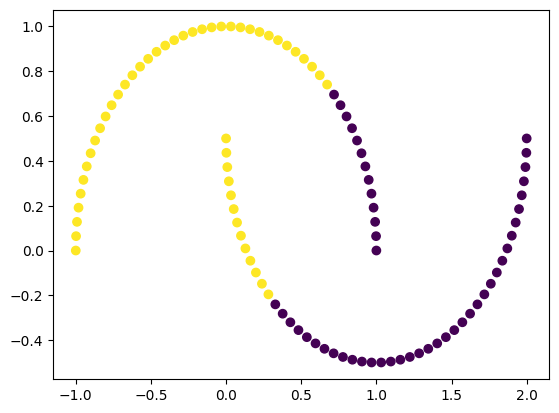

In [18]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_moons()

labels = KMeans(2).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


20. Digits + PCA(3D) + KMeans

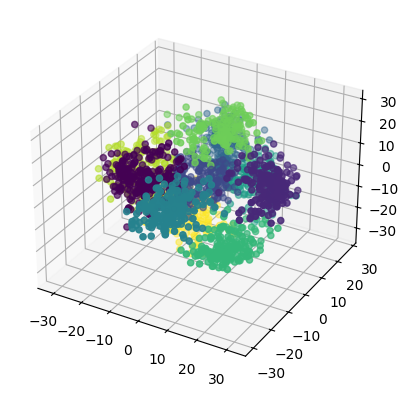

In [19]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = PCA(3).fit_transform(digits.data)

labels = KMeans(10).fit_predict(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=labels)
plt.show()
